In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
from pathlib import Path
import os
import warnings

warnings.filterwarnings("ignore")

PREV_MAX = 80
if os.environ.get("KAGGLE_DATA_PROXY_TOKEN") != None:
    BASE_OUTPUT_PATH = Path(f'/kaggle/working')
    #!pip install talib_binary --no-index --find-links=file:///kaggle/input/ta-lib/
    import subprocess
    import sys

    # subprocess.check_call([sys.executable, "-m", "pip", "install", "talib_binary", "--no-index", "--find-links", "file:///kaggle/input/ta-lib/"])
else:
    BASE_OUTPUT_PATH = Path(f'../output')

BASE_INPUT_PATH = Path(f'../kaggle/input/optiver-trading-at-the-close')
TRAIN_FILE = Path(f'{BASE_INPUT_PATH}/train.csv')

print(f"BASE_OUTPUT_PATH: {BASE_OUTPUT_PATH}")
print(f"BASE_INPUT_PATH: {BASE_INPUT_PATH}")
print(f"TRAIN_FILE: {TRAIN_FILE}")

BASE_OUTPUT_PATH: ../output
BASE_INPUT_PATH: ../kaggle/input/optiver-trading-at-the-close
TRAIN_FILE: ../kaggle/input/optiver-trading-at-the-close/train.csv


In [9]:
train_dataset = pd.read_csv(TRAIN_FILE)
train_dataset.shape

stock_id_1_df = train_dataset[train_dataset['stock_id'] == 1]
write_path =  'stock_id_1_df.csv'
stock_id_1_df.to_csv(write_path, index=False)

In [4]:
train_dataset.head()

,stock_id,date_id,seconds_in_bucket,imbalance_size,imbalance_buy_sell_flag,reference_price,matched_size,far_price,near_price,bid_price,bid_size,ask_price,ask_size,wap,target,time_id,row_id
0,0,0,0,3180602.69,1,0.999812,13380276.64,NaN,NaN,0.999812,60651.50,1.000026,8493.03,1.0,-3.029704,0,0_0_0
1,1,0,0,166603.91,-1,0.999896,1642214.25,NaN,NaN,0.999896,3233.04,1.000660,20605.09,1.0,-5.519986,0,0_0_1
2,2,0,0,302879.87,-1,0.999561,1819368.03,NaN,NaN,0.999403,37956.00,1.000298,18995.00,1.0,-8.389950,0,0_0_2
3,3,0,0,11917682.27,-1,1.000171,18389745.62,NaN,NaN,0.999999,2324.90,1.000214,479032.40,1.0,-4.010200,0,0_0_3
4,4,0,0,447549.96,-1,0.999532,17860614.95,NaN,NaN,0.999394,16485.54,1.000016,434.10,1.0,-7.349849,0,0_0_4


# Explore the dataset

In [5]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5237980 entries, 0 to 5237979
Data columns (total 17 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   stock_id                 int64  
 1   date_id                  int64  
 2   seconds_in_bucket        int64  
 3   imbalance_size           float64
 4   imbalance_buy_sell_flag  int64  
 5   reference_price          float64
 6   matched_size             float64
 7   far_price                float64
 8   near_price               float64
 9   bid_price                float64
 10  bid_size                 float64
 11  ask_price                float64
 12  ask_size                 float64
 13  wap                      float64
 14  target                   float64
 15  time_id                  int64  
 16  row_id                   object 
dtypes: float64(11), int64(5), object(1)
memory usage: 679.4+ MB


In [6]:
train_dataset.isna().sum()

stock_id                         0
date_id                          0
seconds_in_bucket                0
imbalance_size                 220
imbalance_buy_sell_flag          0
reference_price                220
matched_size                   220
far_price                  2894342
near_price                 2857180
bid_price                      220
bid_size                         0
ask_price                      220
ask_size                         0
wap                            220
target                          88
time_id                          0
row_id                           0
dtype: int64

<Axes: xlabel='imbalance_buy_sell_flag', ylabel='Density'>

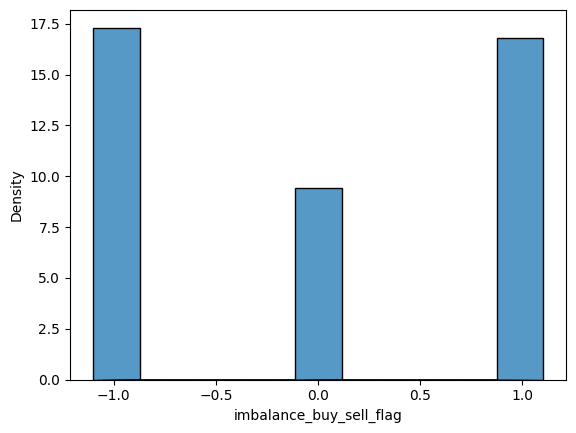

In [7]:
sns.histplot(x=train_dataset.imbalance_buy_sell_flag, shrink=10, stat='density')

<Axes: xlabel='date_id', ylabel='wap'>

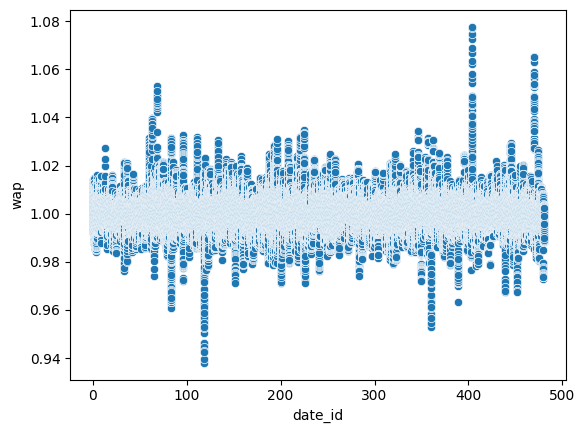

In [8]:
sns.scatterplot(x=train_dataset.date_id, y=train_dataset.wap)

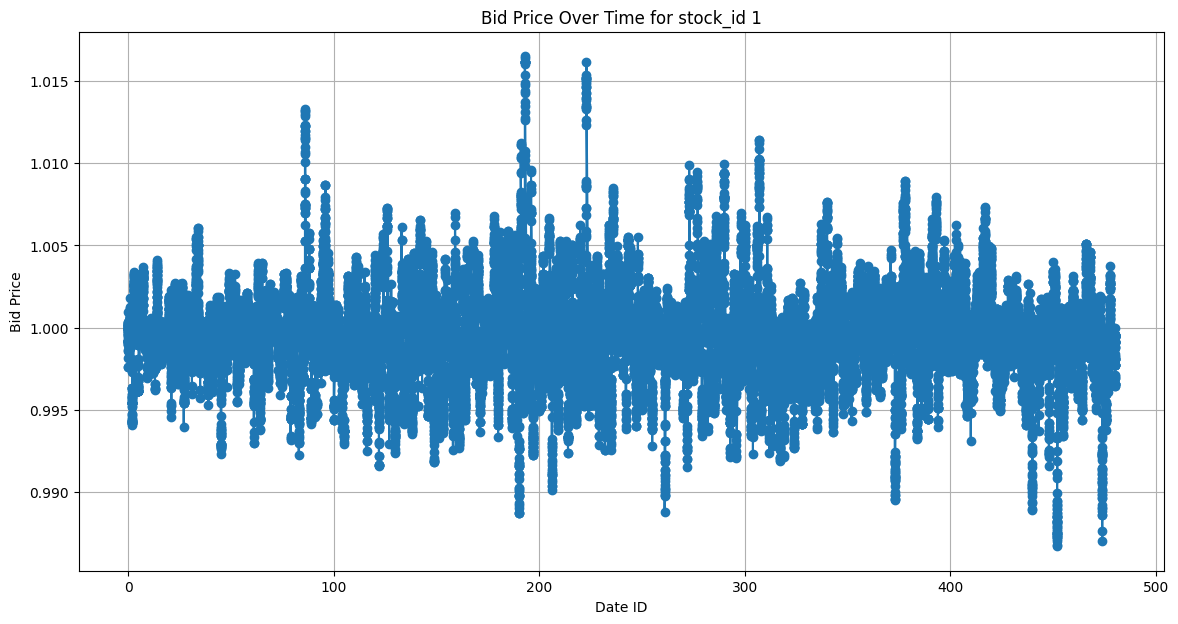

In [9]:
filtered_df = train_dataset[train_dataset['stock_id'] == 1]

# time_idを横軸に、bid_priceを縦軸にしてグラフを描く
plt.figure(figsize=(14, 7))
plt.plot(filtered_df['date_id'], filtered_df['bid_price'], marker='o')
plt.title('Bid Price Over Time for stock_id 1')
plt.xlabel('Date ID')
plt.ylabel('Bid Price')
plt.grid(True)
plt.show()

<Axes: xlabel='wap', ylabel='Count'>

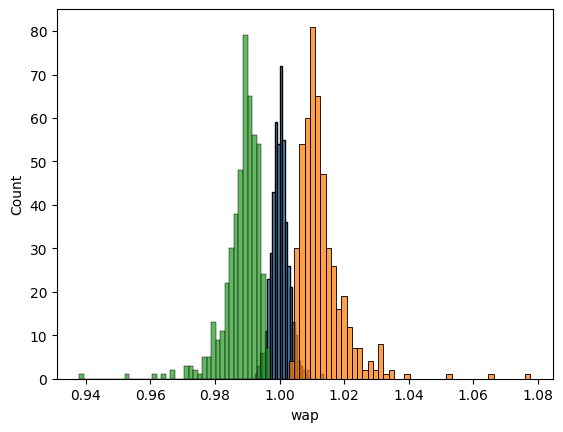

In [10]:
# sns.histplot(x=train_dataset.groupby('date_id').first().near_price)
sns.histplot(x=train_dataset.groupby('date_id').last().wap, label='last')
sns.histplot(x=train_dataset.groupby('date_id').wap.max(), label='max')
sns.histplot(x=train_dataset.groupby('date_id').wap.min(), label='min')

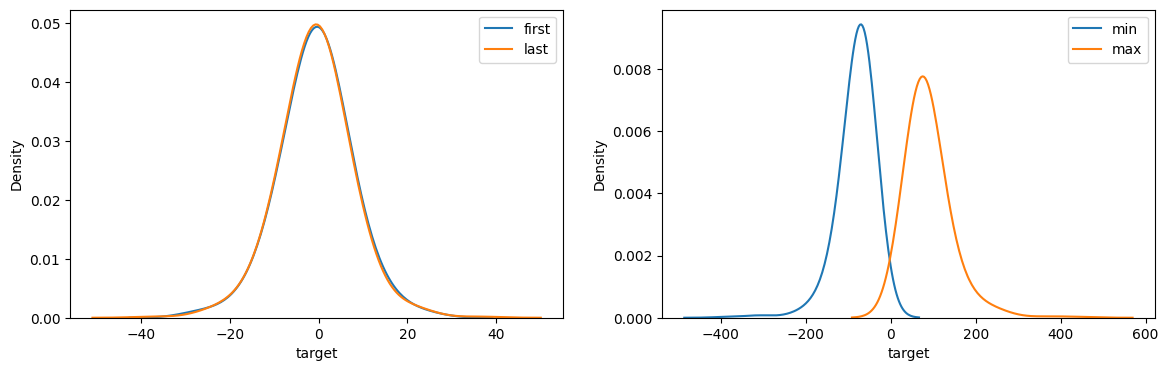

In [11]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.kdeplot(x=train_dataset.groupby('date_id').target.first(), bw_adjust=2, label='first')
sns.kdeplot(x=train_dataset.groupby('date_id').target.last(), bw_adjust=2, label='last')
plt.legend()
plt.subplot(122)
sns.kdeplot(x=train_dataset.groupby('date_id').target.min(), bw_adjust=3, label='min')
sns.kdeplot(x=train_dataset.groupby('date_id').target.max(), bw_adjust=3, label='max')
plt.legend()

<Axes: xlabel='target', ylabel='Density'>

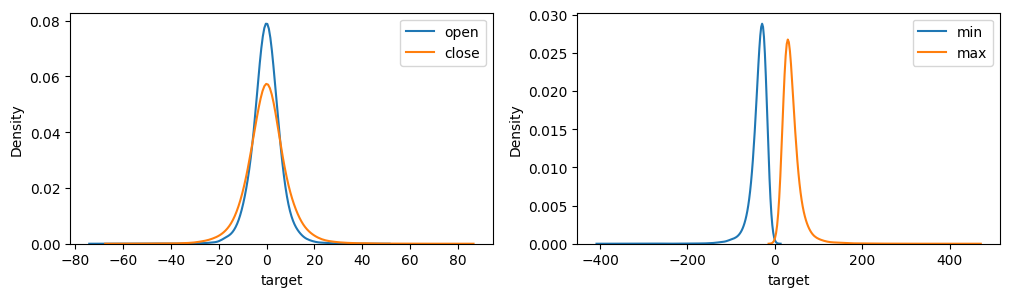

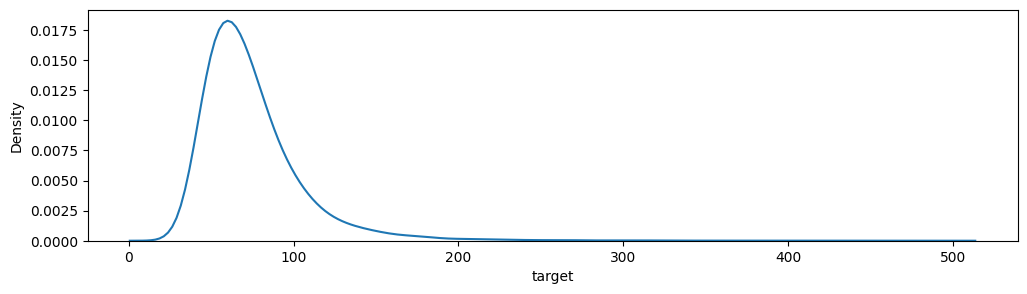

In [12]:
plt.figure(figsize=(12,3))
plt.subplot(121)
sns.kdeplot(x=train_dataset.groupby('time_id').target.first(), bw_adjust=2, label='open')
sns.kdeplot(x=train_dataset.groupby('time_id').target.last(), bw_adjust=2, label='close')
plt.legend()
plt.subplot(122)
sns.kdeplot(x=train_dataset.groupby('time_id').target.min(), bw_adjust=3, label='min')
sns.kdeplot(x=train_dataset.groupby('time_id').target.max(), bw_adjust=3, label='max')
plt.legend()
plt.figure(figsize=(12,3))
sns.kdeplot(x=train_dataset.groupby('time_id').target.max() - train_dataset.groupby('time_id').target.min(), bw_adjust=2, label='max - min')

# Features selection

For this first step, let's exclude the columns 'far_price' and 'near_price' with half missing values.  
Remove the missing values in the remaining columns

In [13]:
features = ['imbalance_size', 'imbalance_buy_sell_flag', 'reference_price', 'matched_size', 
            'bid_price', 'bid_size', 'ask_price', 'ask_size', 'wap']

# Build model

In [14]:
train_dataset_drop = train_dataset[features+['target']].dropna()
X = train_dataset_drop.drop(columns='target')
y = train_dataset_drop[['target']]

In [15]:
callbacks_list = [tf.keras.callbacks.EarlyStopping(
                  monitor='val_loss',
                  restore_best_weights=True,
                  patience=5)] 

In [16]:
def create_model(X, y):
    
    input_layer = tf.keras.Input(shape=(X.shape[1], ))
    
    x = tf.keras.layers.BatchNormalization()(input_layer)
#     x = tf.keras.layers.Dense(512)(x)
#     x = tf.keras.layers.Dense(256)(x)
    x = tf.keras.layers.Dense(128, activation='tanh')(x)
    x = tf.keras.layers.Dense(64, activation='tanh')(x)
    
    output_layer = tf.keras.layers.Dense(y.shape[1])(x)
    
    model = tf.keras.Model(inputs=input_layer, outputs=output_layer)
    
    model.compile(optimizer=tf.keras.optimizers.Adam(),
                  loss=tf.keras.losses.MeanAbsoluteError(),
                  metrics=['mse'])
    
    return model

model = create_model(X, y)
model.fit(X, y, 
          epochs=100, 
          steps_per_epoch=100,
          callbacks=callbacks_list,
          validation_split=0.1)

Epoch 1/100
100/100 [==============================] - 13s 121ms/step - loss: 6.4399 - mse: 90.0498 - val_loss: 6.0415 - val_mse: 80.5976
Epoch 2/100
100/100 [==============================] - 13s 129ms/step - loss: 6.4225 - mse: 89.6489 - val_loss: 5.9629 - val_mse: 79.4058
Epoch 3/100
100/100 [==============================] - 14s 137ms/step - loss: 6.4144 - mse: 89.4420 - val_loss: 5.9441 - val_mse: 79.1134
Epoch 4/100
100/100 [==============================] - 14s 137ms/step - loss: 6.4091 - mse: 89.2880 - val_loss: 5.9515 - val_mse: 79.1831
Epoch 5/100
100/100 [==============================] - 12s 121ms/step - loss: 6.4011 - mse: 89.0793 - val_loss: 5.9324 - val_mse: 78.9026
Epoch 6/100
100/100 [==============================] - 13s 127ms/step - loss: 6.3893 - mse: 88.7738 - val_loss: 5.9204 - val_mse: 78.6721
Epoch 7/100
100/100 [==============================] - 16s 160ms/step - loss: 6.3780 - mse: 88.4707 - val_loss: 5.9152 - val_mse: 78.5342
Epoch 8/100
100/100 [=============

# Submission

In [17]:
test_dataset = pd.read_csv('../kaggle/input/optiver-trading-at-the-close/test.csv')
test_dataset.head()

,stock_id,date_id,seconds_in_bucket,imbalance_size,imbalance_buy_sell_flag,reference_price,matched_size,far_price,near_price,bid_price,bid_size,ask_price,ask_size,wap,time_id,row_id
0,0,478,0,3753451.43,-1,0.999875,11548975.43,NaN,NaN,0.999875,22940.00,1.000050,9177.60,1.0,26290,478_0_0
1,1,478,0,985977.11,-1,1.000245,3850033.97,NaN,NaN,0.999940,1967.90,1.000601,19692.00,1.0,26290,478_0_1
2,2,478,0,599128.74,1,1.000584,4359198.25,NaN,NaN,0.999918,4488.22,1.000636,34955.12,1.0,26290,478_0_2
3,3,478,0,2872317.54,-1,0.999802,27129551.64,NaN,NaN,0.999705,16082.04,1.000189,10314.00,1.0,26290,478_0_3
4,4,478,0,740059.14,-1,0.999886,8880890.78,NaN,NaN,0.999720,19012.35,1.000107,7245.60,1.0,26290,478_0_4


In [18]:
predictions = model.predict(test_dataset[features])


1032/1032 [==============================] - 1s 426us/step


In [19]:
predictions.shape

(33000, 1)

In [20]:
test_dataset[features].shape

(33000, 9)

In [21]:
# featuresリストをDataFrameに変換
features_df = pd.DataFrame(features)

# predictionsをDataFrameに変換
predictions_df = pd.DataFrame(predictions, columns=['prediction'])

# 横に結合する
result = pd.concat([features_df, predictions_df], axis=1)

In [22]:
# Assuming 'result' is a pandas DataFrame with 'target' and 'prediction' columns.
# Calculate the absolute differences
absolute_errors = (result['target'] - result['prediction']).abs()

# Calculate the Mean Absolute Error (MAE)
mae = absolute_errors.mean()


KeyError: 'target'

ModuleNotFoundError: No module named 'optiver2023'